# MKA-MLF, Lab_08 - RNN

Recurrent Neural Networks, are a class of artificial neural networks designed to recognize patterns in sequences of data, such as text, genomes, handwriting, or spoken words. Unlike traditional neural networks, which assume all inputs (and outputs) are independent of each other, RNNs are designed to recognize sequential or temporal patterns, making them especially suited for tasks like language modeling, speech recognition, and time series prediction.

## Exercise 1 - Time Series Forecasting

### 1.0 Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Flatten, SimpleRNN

### 1.1 Generating dataset

In [2]:
def generate_time_series(batch_size, n_steps):
  freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
  time = np.linspace(0,1,n_steps)

  series = 0.5 * np.sin((time - offsets1) * (freq1*10 + 10))
  series += 0.2 * np.sin((time - offsets2) * (freq2*20 + 20))
  series += 0.1 * (np.random.rand(batch_size, n_steps)- 0.5)
  return series[..., np.newaxis].astype(np.float32)

In [3]:
data_size = 10000
n_steps = 50
np.random.seed(0)

series = generate_time_series(data_size, n_steps + 1)

### 1.2 Train/Valid/Test split

In [4]:
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]

In [5]:
no_training_epochs = 5

### 1.3 Data examination

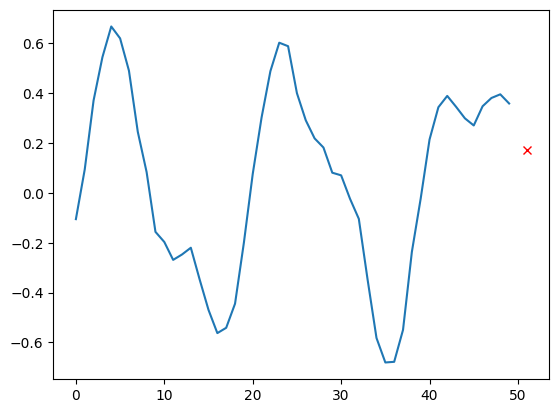

In [6]:
plt.figure()
plt.plot(X_train[0])
plt.plot(n_steps+1, y_train[0], 'rx')

### 1.4 Simple Linear model

In [8]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

# Model definition
model_linear = Sequential()
model_linear.add(Flatten(input_shape=(50,1)))
model_linear.add(Dense(1, activation=None))

In [10]:
from keras.optimizers import Adam

# Model building
learning_rate = 0.001
optimizer = Adam(learning_rate)
model_linear.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_squared_error'])

In [11]:
model_linear.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 51 (204.00 Byte)
Trainable params: 51 (204.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# Model training

history_linear = model_linear.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 [==============================] - 5s 6ms/step - loss: 0.1214 - mean_squared_error: 0.1214 - val_loss: 0.0476 - val_mean_squared_error: 0.0476
Epoch 2/5
219/219 [==============================] - 1s 4ms/step - loss: 0.0296 - mean_squared_error: 0.0296 - val_loss: 0.0186 - val_mean_squared_error: 0.0186
Epoch 3/5
219/219 [==============================] - 1s 3ms/step - loss: 0.0144 - mean_squared_error: 0.0144 - val_loss: 0.0115 - val_mean_squared_error: 0.0115
Epoch 4/5
219/219 [==============================] - 1s 3ms/step - loss: 0.0101 - mean_squared_error: 0.0101 - val_loss: 0.0087 - val_mean_squared_error: 0.0087
Epoch 5/5
219/219 [==============================] - 1s 3ms/step - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0074 - val_mean_squared_error: 0.0074


In [13]:
def plot_function(history):
  plt.figure()

  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='validation_loss')
  plt.legend()
  plt.grid()
  plt.xlim([0,no_training_epochs-1])
  plt.xlabel('epochs')

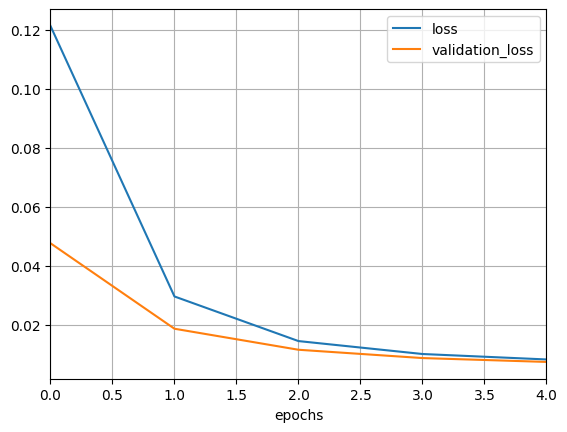

In [14]:
plot_function(history_linear)

In [15]:
score = model_linear.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test MSE: ', score[1])

Test loss: 0.007328311912715435
Test MSE:  0.007328311912715435


### 1.5 Simple RNN Model

In [16]:
model_simple_rnn = Sequential()
model_simple_rnn.add(SimpleRNN(1, input_shape=[50, 1]))

In [17]:
learning_rate_simple_rnn = 0.001
optimizer_simple_rnn = Adam(learning_rate_simple_rnn)
model_simple_rnn.compile(loss='mean_squared_error', optimizer=optimizer_simple_rnn, metrics=['mean_squared_error'])

In [18]:
history_simple_rnn = model_simple_rnn.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 [==============================] - 9s 38ms/step - loss: 0.6950 - mean_squared_error: 0.6950 - val_loss: 0.5828 - val_mean_squared_error: 0.5828
Epoch 2/5
219/219 [==============================] - 7s 31ms/step - loss: 0.4058 - mean_squared_error: 0.4058 - val_loss: 0.3843 - val_mean_squared_error: 0.3843
Epoch 3/5
219/219 [==============================] - 8s 36ms/step - loss: 0.3325 - mean_squared_error: 0.3325 - val_loss: 0.3313 - val_mean_squared_error: 0.3313
Epoch 4/5
219/219 [==============================] - 8s 36ms/step - loss: 0.2891 - mean_squared_error: 0.2891 - val_loss: 0.2975 - val_mean_squared_error: 0.2975
Epoch 5/5
219/219 [==============================] - 7s 31ms/step - loss: 0.2566 - mean_squared_error: 0.2566 - val_loss: 0.2605 - val_mean_squared_error: 0.2605


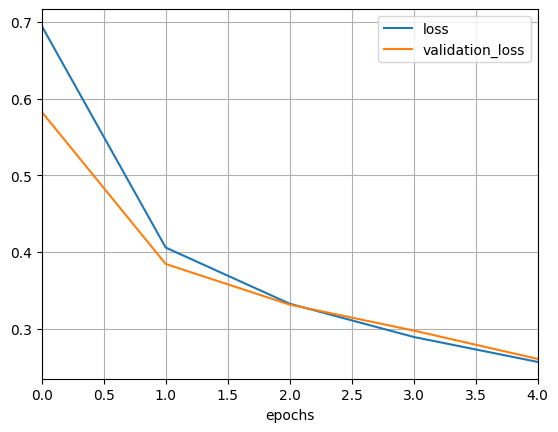

In [19]:
plot_function(history_simple_rnn)

### 1.5 Deep RNN Model

In [20]:
model_deep_rnn = Sequential()
model_deep_rnn.add(SimpleRNN(20, return_sequences = True, input_shape=[50, 1]))
model_deep_rnn.add(SimpleRNN(20, return_sequences = True))
model_deep_rnn.add(SimpleRNN(1, input_shape=[50, 1]))

In [21]:
learning_rate_deep_rnn = 0.001
optimizer_deep_rnn = Adam(learning_rate_deep_rnn)
model_deep_rnn.compile(loss='mean_squared_error', optimizer=optimizer_deep_rnn, metrics=['mean_squared_error'])

In [22]:
history_deep_rnn = model_deep_rnn.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 [==============================] - 36s 143ms/step - loss: 0.0589 - mean_squared_error: 0.0589 - val_loss: 0.0120 - val_mean_squared_error: 0.0120
Epoch 2/5
219/219 [==============================] - 29s 132ms/step - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.0054 - val_mean_squared_error: 0.0054
Epoch 3/5
219/219 [==============================] - 29s 132ms/step - loss: 0.0056 - mean_squared_error: 0.0056 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 4/5
219/219 [==============================] - 31s 143ms/step - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0043 - val_mean_squared_error: 0.0043
Epoch 5/5
219/219 [==============================] - 29s 132ms/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0037 - val_mean_squared_error: 0.0037


In [23]:
score = model_deep_rnn.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test MSE: ', score[1])

Test loss: 0.0037706249859184027
Test MSE:  0.0037706249859184027


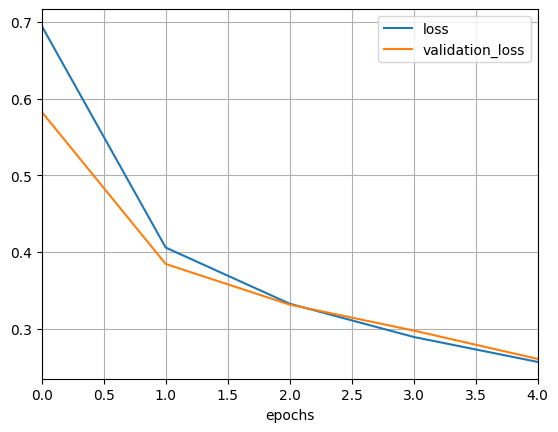

In [24]:
plot_function(history_simple_rnn)

## Exercise 2 - The movie review




Based on the written rewiev, classify if the movie if good or bad

### 2.0 - Import libraries

In [43]:
from keras.preprocessing.text import Tokenizer
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, SimpleRNN, GRU
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from keras.optimizers import Adam

### 2.1 - Load dataset

In [44]:
(X_train, y_train), (X_test, y_test) = keras.datasets.imdb.load_data()

### 2.2 - Dataset examination

In [45]:
word_index = keras.datasets.imdb.get_word_index()
id_to_word = {id_ + 3:word for word, id_ in word_index.items()}
for id_, token in enumerate(("<pad>", "<sos>", "<unk>")):
  id_to_word[id_] = token

In [47]:
single_sequence = " ".join([id_to_word[id_] for id_ in X_train[0][:]])

In [48]:
single_sequence

"<sos> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and shou

In [49]:
max_length = 150  # Define the maximum length of a review
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_length, padding='post', truncating='post', value=0)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_length, padding='post', truncating='post', value=0)

In [50]:
embed_size = 128
vocabulary_size = 1000

model = keras.models.Sequential([
    keras.layers.Embedding(vocabulary_size, embed_size,
                           input_shape=[None]),
    keras.layers.SimpleRNN(128, return_sequences=True),
    keras.layers.SimpleRNN(128),
    keras.layers.Dense(1, activation='sigmoid')
    ])


In [51]:
optimizer = Adam(learning_rate = 0.001)

In [52]:
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [53]:
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
625/625 [==============================] - 172s 270ms/step - loss: 0.7030 - accuracy: 0.5009 - val_loss: 0.6943 - val_accuracy: 0.5062
Epoch 2/5
625/625 [==============================] - 146s 233ms/step - loss: 0.6954 - accuracy: 0.5013 - val_loss: 0.6942 - val_accuracy: 0.5062
Epoch 3/5
625/625 [==============================] - 142s 227ms/step - loss: 0.6960 - accuracy: 0.4973 - val_loss: 0.6943 - val_accuracy: 0.5062
Epoch 4/5
625/625 [==============================] - 142s 227ms/step - loss: 0.6946 - accuracy: 0.5020 - val_loss: 0.6987 - val_accuracy: 0.4938
Epoch 5/5
625/625 [==============================] - 139s 223ms/step - loss: 0.6955 - accuracy: 0.5068 - val_loss: 0.6969 - val_accuracy: 0.4938


In [54]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: ', score[1]*100, "%")

Test loss: 0.6959365010261536
Test accuracy:  50.0 %


TASK: Modify structure, change the core of the network from RNN to LTSM and GRU. Compare the results

In [55]:
#LSTM
from keras.layers import SimpleRNN, Dense
embed_size = 128
vocabulary_size = 1000

model = keras.models.Sequential([
    keras.layers.Embedding(vocabulary_size, embed_size,
                           input_shape=[None]),
    keras.layers.LSTM(128, return_sequences=True),
    keras.layers.LSTM(128),
    keras.layers.Dense(1, activation='sigmoid')
    ])

In [56]:
optimizer = Adam(learning_rate = 0.001)

In [57]:
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [58]:
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
625/625 [==============================] - 38s 55ms/step - loss: 0.6398 - accuracy: 0.6326 - val_loss: 0.6740 - val_accuracy: 0.5680
Epoch 2/5
625/625 [==============================] - 14s 22ms/step - loss: 0.6638 - accuracy: 0.5907 - val_loss: 0.6806 - val_accuracy: 0.5350
Epoch 3/5
625/625 [==============================] - 12s 20ms/step - loss: 0.6549 - accuracy: 0.5885 - val_loss: 0.5319 - val_accuracy: 0.7610
Epoch 4/5
625/625 [==============================] - 12s 19ms/step - loss: 0.4921 - accuracy: 0.7725 - val_loss: 0.4552 - val_accuracy: 0.7962
Epoch 5/5
625/625 [==============================] - 11s 17ms/step - loss: 0.4624 - accuracy: 0.7918 - val_loss: 0.4666 - val_accuracy: 0.7764


In [59]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: ', score[1]*100, "%")

Test loss: 0.4587322771549225
Test accuracy:  77.66000032424927 %


In [60]:
#GRU
from keras.layers import GRU, Dense
embed_size = 128
vocabulary_size = 1000

model = keras.models.Sequential([
    keras.layers.Embedding(vocabulary_size, embed_size,
                           input_shape=[None]),
    keras.layers.GRU(128, return_sequences=True),
    keras.layers.GRU(128),
    keras.layers.Dense(1, activation='sigmoid')
    ])

In [61]:
optimizer = Adam(learning_rate = 0.001)

In [62]:
model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [63]:
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
625/625 [==============================] - 42s 63ms/step - loss: 0.6429 - accuracy: 0.5979 - val_loss: 0.4912 - val_accuracy: 0.7668
Epoch 2/5
625/625 [==============================] - 17s 27ms/step - loss: 0.4187 - accuracy: 0.8077 - val_loss: 0.3851 - val_accuracy: 0.8282
Epoch 3/5
625/625 [==============================] - 16s 25ms/step - loss: 0.3568 - accuracy: 0.8414 - val_loss: 0.3718 - val_accuracy: 0.8380
Epoch 4/5
625/625 [==============================] - 12s 19ms/step - loss: 0.3301 - accuracy: 0.8565 - val_loss: 0.3796 - val_accuracy: 0.8332
Epoch 5/5
625/625 [==============================] - 10s 16ms/step - loss: 0.3090 - accuracy: 0.8661 - val_loss: 0.3922 - val_accuracy: 0.8250


In [64]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test accuracy: ', score[1]*100, "%")

Test loss: 0.3784332275390625
Test accuracy:  82.59199857711792 %


First RNN was 0.69317 test loss and 50% accuracy for 15min long
The LTSM was 0.458 test loss and 77.66% accuracy for 2min long
The GRU was 0.378 test loss and 82.59% accuracy for 2min long
RNN is way longer and less precise than the other two, then comes LTSM and GRU. GRU and LTSM take approximately the same time but we can see that GRU is more accurate and has less test loss.